# Import most important libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
# ^^^ pyforest auto-imports - don't write above this line
import numpy as np
import pandas as pd

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Read The Dataset

In [2]:
data = pd.read_csv("D:\college\سنة رابعة\ML\Assignments\Assignment 1\car_data.csv")
df = data.copy()

# Inspect The Data 

In [3]:
# Show The Head of rows in the data 
df.head()

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Summary Statistics
df.describe()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
# Information about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   name              205 non-null    object 
 3   fueltypes         205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumbers       205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
# Discover Null Values
df.isnull().sum()

ID                  0
symboling           0
name                0
fueltypes           0
aspiration          0
doornumbers         0
carbody             0
drivewheels         0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
# Split the numerical features only in new dataframe called df_numeric
df_numeric = df.select_dtypes(include=['float64','int64'])

In [8]:
# show columns names
df_numeric.columns

Index(['ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

<AxesSubplot:>

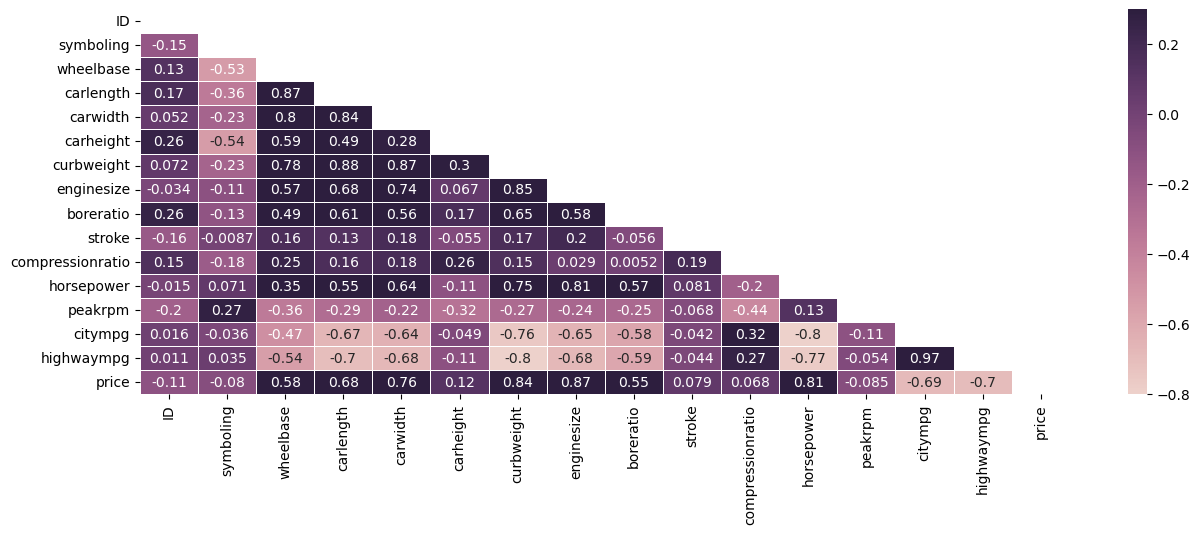

In [9]:
plt.figure(figsize=(15,5))
corr = df_numeric.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,annot=True,linewidth=.5,cmap=sns.cubehelix_palette(as_cmap=True),vmax=.3,mask=mask)

# Its is there arrange of the high correlated  features to the target


In [10]:
# enginesize , curbweight , horsepower , carwidth , highwaympg , citympg ,carlength , wheelbase , boreratio 

# Some scatter plots to find the high correlated features to the target

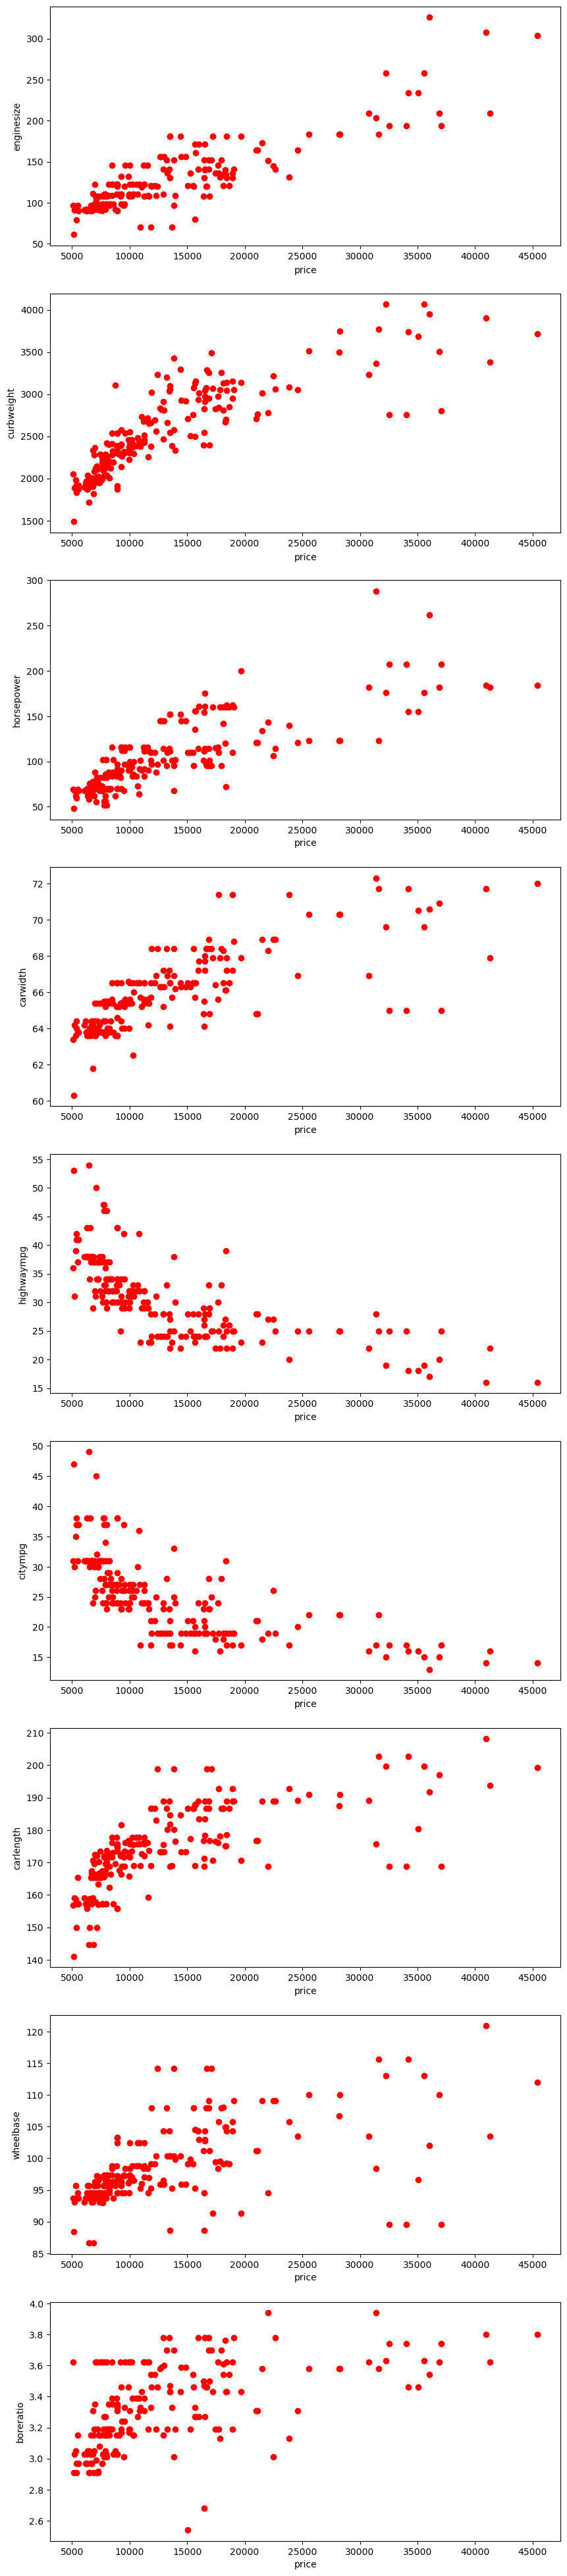

In [11]:
f, axes = plt.subplots(nrows = 9, ncols = 1,figsize=(10,50))

axes[0].scatter(x=df_numeric["price"],y=df_numeric["enginesize"], marker = "o",color="r")
axes[0].set_xlabel('price', labelpad = 5)
axes[0].set_ylabel('enginesize', labelpad = 5)


axes[1].scatter(x=df_numeric["price"],y=df_numeric["curbweight"], marker = 'o',color="r")
axes[1].set_xlabel('price', labelpad = 5)
axes[1].set_ylabel('curbweight', labelpad = 5)

axes[2].scatter(x=df_numeric["price"],y=df_numeric["horsepower"], marker = 'o',color="r")
axes[2].set_xlabel('price')
axes[2].set_ylabel('horsepower', labelpad = 5)

axes[3].scatter(x=df_numeric["price"],y=df_numeric["carwidth"], marker = 'o',color="r" )
axes[3].set_xlabel('price')
axes[3].set_ylabel('carwidth', labelpad = 5)

axes[4].scatter(x=df_numeric["price"],y=df_numeric["highwaympg"], marker = 'o' ,color="r")
axes[4].set_xlabel('price')
axes[4].set_ylabel('highwaympg', labelpad = 5)

axes[5].scatter(x=df_numeric["price"],y=df_numeric["citympg"], marker = 'o',color="r" )
axes[5].set_xlabel('price')
axes[5].set_ylabel('citympg', labelpad = 5)

axes[6].scatter(x=df_numeric["price"],y=df_numeric["carlength"], marker = 'o',color="r" )
axes[6].set_xlabel('price')
axes[6].set_ylabel('carlength', labelpad = 5)

axes[7].scatter(x=df_numeric["price"],y=df_numeric["wheelbase"], marker = 'o',color="r" )
axes[7].set_xlabel('price')
axes[7].set_ylabel('wheelbase', labelpad = 5)


axes[8].scatter(x=df_numeric["price"],y=df_numeric["boreratio"], marker = 'o' ,color="r")
axes[8].set_xlabel('price')
axes[8].set_ylabel('boreratio', labelpad = 5)



plt.show()

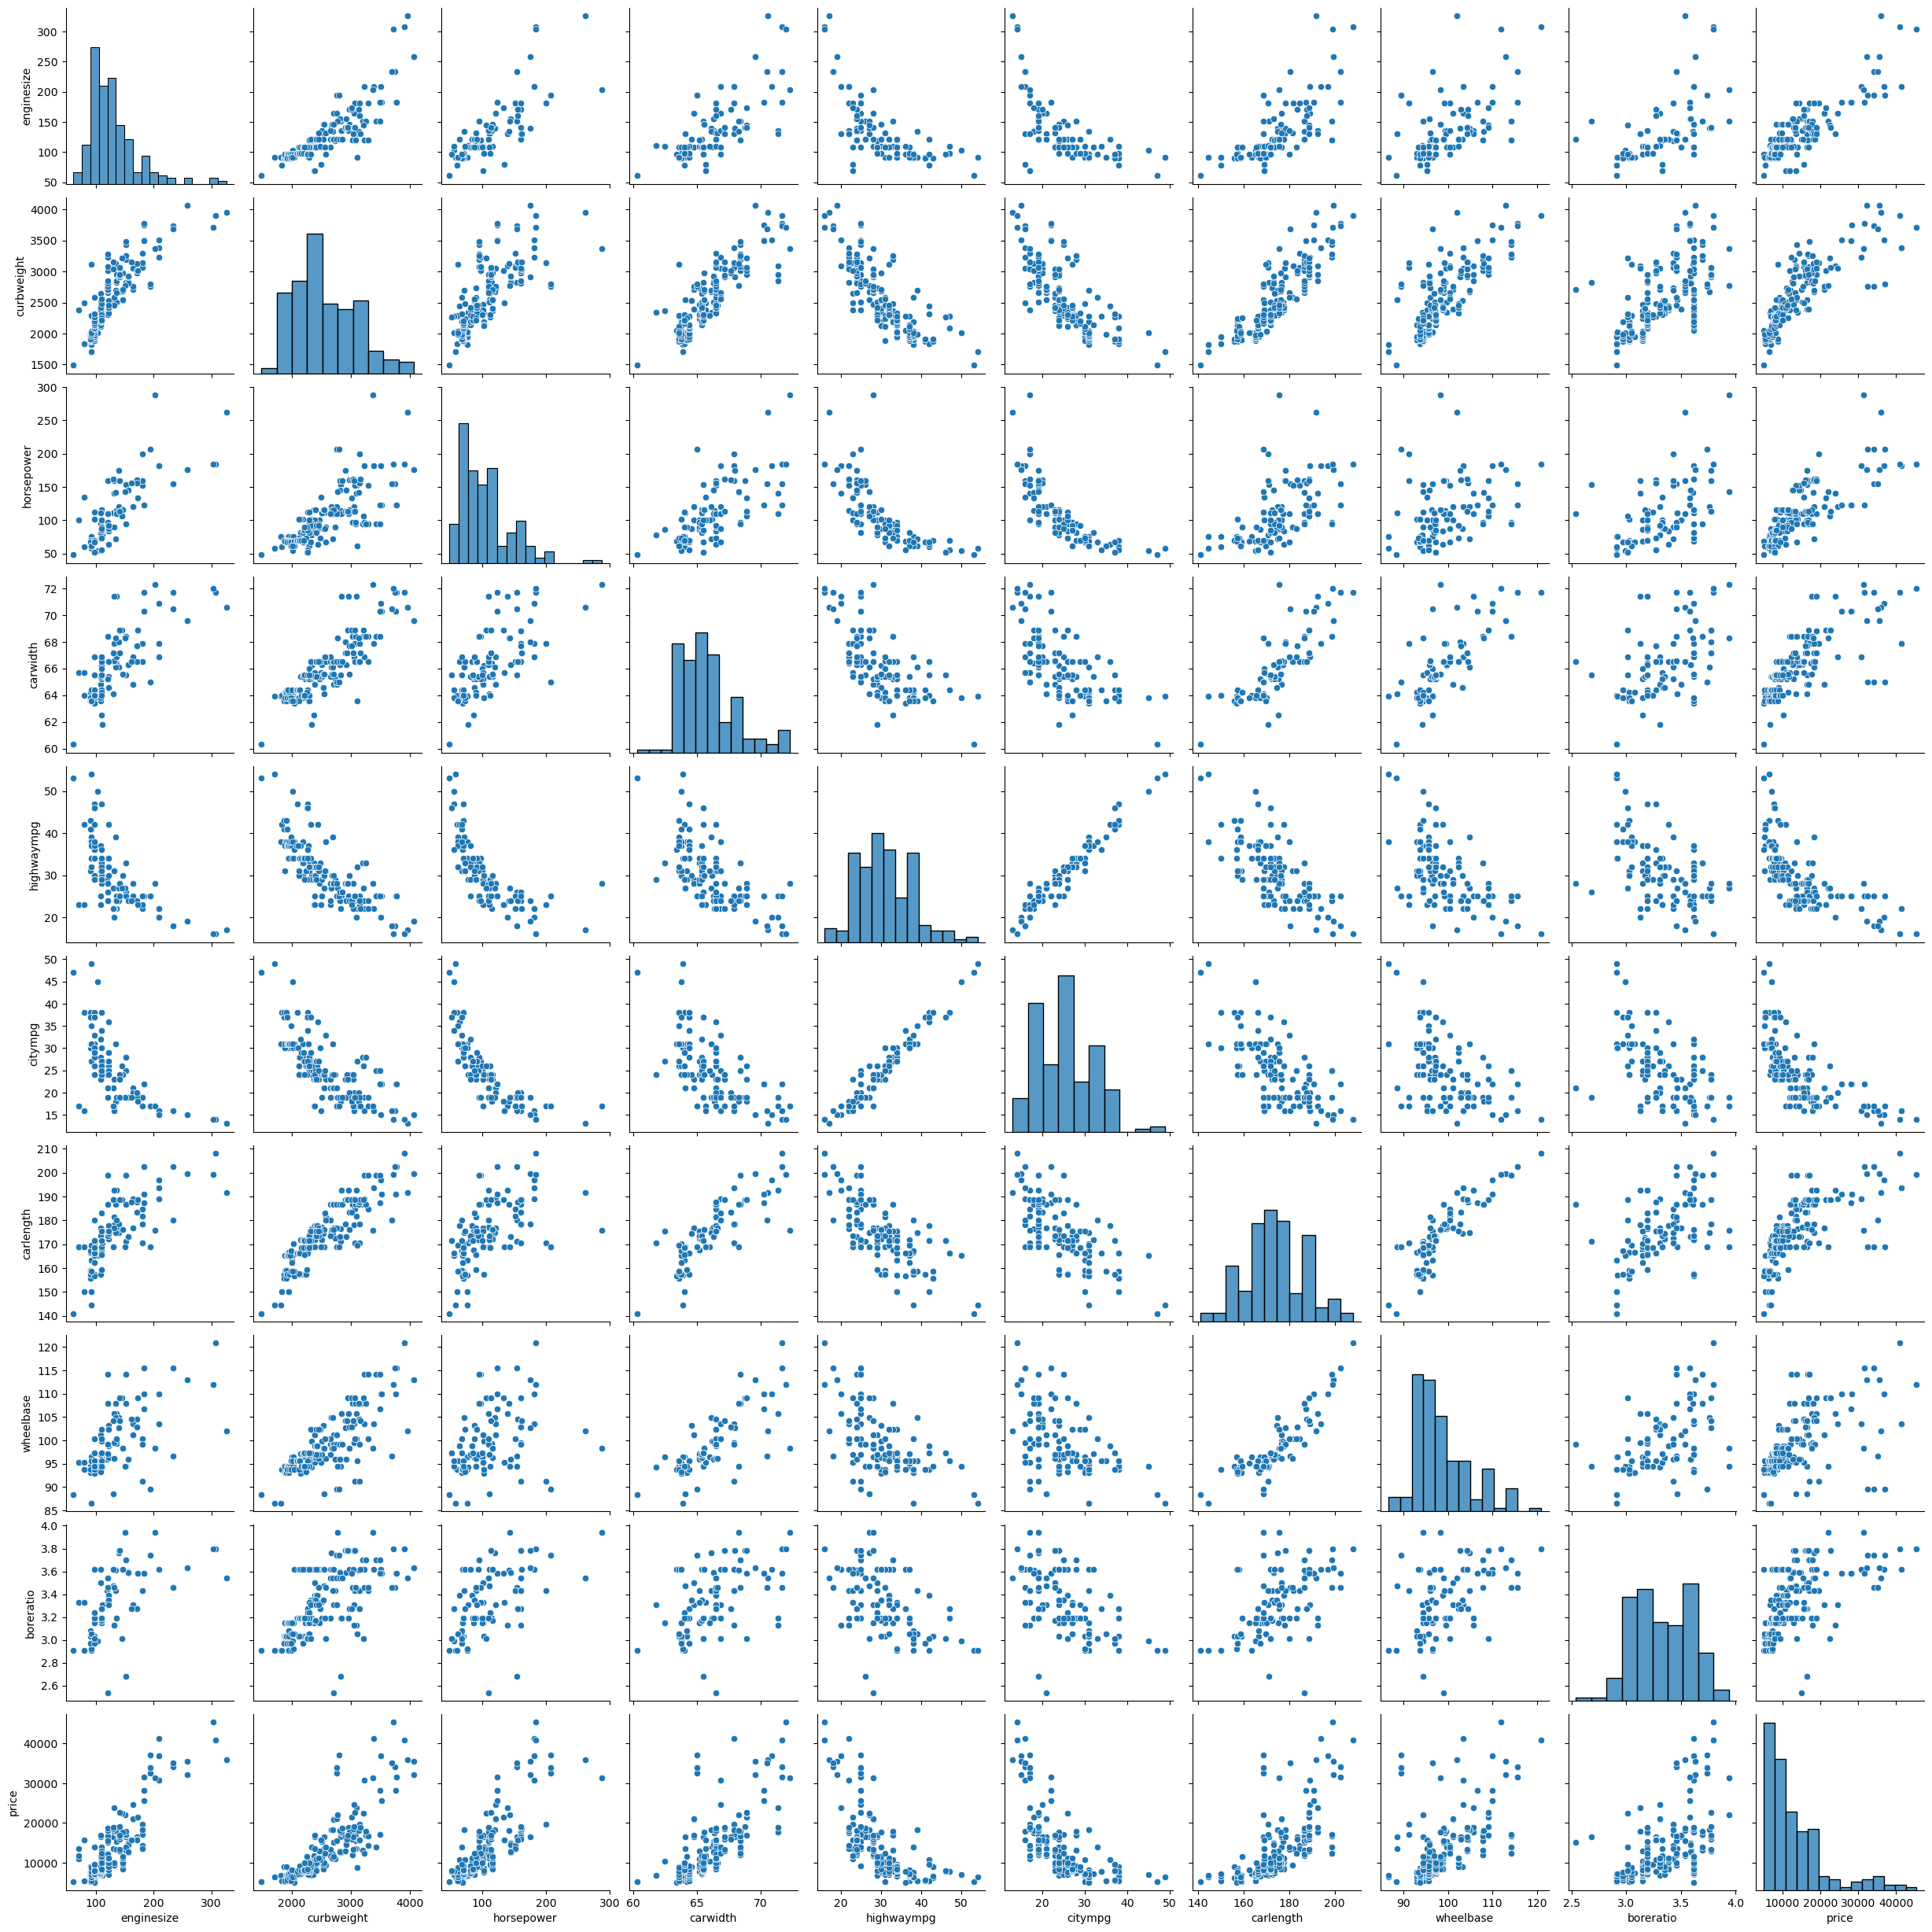

In [12]:
df_important_features = df_numeric[['enginesize' , 'curbweight' , 'horsepower' , 'carwidth' , 'highwaympg' , 'citympg' ,'carlength' , 'wheelbase' , 'boreratio' ,'price']]
sns.pairplot(df_important_features)

# Get important features to start moodeling

In [13]:
# enginesize , curbweight , horsepower , carwidth , highwaympg , citympg ,carlength , wheelbase , boreratio 

> so we choose the 'enginesize' , 'curbweight' , 'horsepower' , 'carwidth'  that they have high relationship with the target(Price)

# Create new DataFrame with the important features and target

In [14]:
new_df = df[['enginesize' , 'curbweight' , 'horsepower' , 'carwidth',"price"]]
new_df.head(2)

,enginesize,curbweight,horsepower,carwidth,price
0,130,2548,111,64.1,13495.0
1,130,2548,111,64.1,16500.0


# Standered scaler

In [15]:
new_df["enginesize"] = (new_df["enginesize"] - np.mean(new_df["enginesize"]))/np.std(new_df["enginesize"])
new_df["curbweight"] = (new_df["curbweight"] - np.mean(new_df["curbweight"]))/np.std(new_df["curbweight"])
new_df["horsepower"] = (new_df["horsepower"] - np.mean(new_df["horsepower"]))/np.std(new_df["horsepower"])
new_df["carwidth"] = (new_df["carwidth"] - np.mean(new_df["carwidth"]))/np.std(new_df["carwidth"])

C:\Users\User\AppData\Local\Temp/ipykernel_26868/2804250158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["enginesize"] = (new_df["enginesize"] - np.mean(new_df["enginesize"]))/np.std(new_df["enginesize"])
C:\Users\User\AppData\Local\Temp/ipykernel_26868/2804250158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["curbweight"] = (new_df["curbweight"] - np.mean(new_df["curbweight"]))/np.std(new_df["curbweight"])
C:\Users\User\AppData\Local\Temp/ipykernel_26868/2804250158.py:3: SettingW

In [16]:
new_df.head()

,enginesize,curbweight,horsepower,carwidth,price
0,0.074449,-0.014566,0.174483,-0.844782,13495.0
1,0.074449,-0.014566,0.174483,-0.844782,16500.0
2,0.604046,0.514882,1.264536,-0.190566,16500.0
3,-0.431076,-0.420797,-0.053668,0.136542,13950.0
4,0.218885,0.516807,0.275883,0.230001,17450.0


# Modeling

#### Trian test split

In [17]:
x = new_df.drop("price",axis=1).values
y = new_df["price"].values

In [18]:
x_train = x[:180]
x_test = x[180:205]
y_train = y[:180]
y_test = y[180:205]

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(180, 4)
(25, 4)
(180,)
(25,)


# Class Linear Regression

In [25]:
# LogisticRegression class
n_samples = x_train.shape[0]
n_features = x_train.shape[1]

def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)

class Linear_Regression:
    def __init__(self,lr=0.001,n_iter=700):
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = None
        self.cost_list = []
        self.meanSE = []
        
        
    def fit(self,x_train,y_train):
        #print("self.weights:",self.weights)
        self.weights = np.zeros(n_features) 
        self.bias = 0 
        #print("self.bias",self.bias)

        
        for _ in range(self.n_iter):
            y_pred = np.dot(x_train, self.weights) + self.bias   # 180*4 X 4*1 = 180*1
            #print("predictions.shape = ",predictions.shape)
            
            # updating weights
            # partial dreviative to weights
            dw = (1/n_samples) * np.dot(x_train.T, (y_pred - y_train))  # 4*180  180*1  = 4*1
#             print("dw.shape = ",dw.shape)
#             print("dw[1]",dw[0])
#             print("dw[2]",dw[1])
#             print("dw[3]",dw[2])
#             print("dw[4]",dw[3])
            
            # partial dreviative 
            db = (1/n_samples) * np.sum(y_pred-y_train)  #1
            #print("db = ",db)

            self.weights = self.weights - self.lr*dw     
            #print("self.weights = ",self.weights)

            self.bias = self.bias - self.lr*db
            #print("self.bias = ",self.bias)
            #print("---------------------------")
            cost = (np.matmul(x_train, self.weights)-y_train).T @ (np.matmul(x_train, self.weights)-y_train)/(2*y_train.shape[0]) 
            msee = mse(y_train,y_pred)
            self.cost_list.append(cost)
            self.meanSE.append(msee)
            
            #print(mse(y_train,y_pred),"\n")
        return self.cost_list,self.meanSE

    def predict(self,x_test):
        linear_predictions = np.dot(x_test,self.weights)+self.bias    #25*4 4*1  = 25*1 + 1
        return linear_predictions

In [26]:
Model = Linear_Regression(lr=0.001)
cost,mse = Model.fit(x_train,y_train)
prediction = Model.predict(x_test)

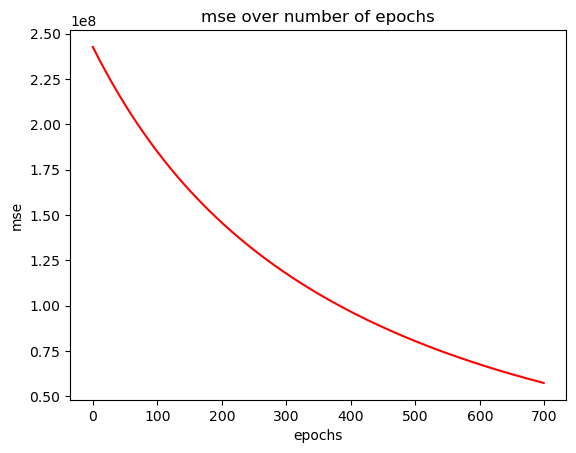

In [31]:
mse = pd.DataFrame(mse)
sns.lineplot(y=mse[0],x=mse.index,color="r")
plt.ylabel("mse")
plt.xlabel("epochs");
plt.title("mse over number of epochs");

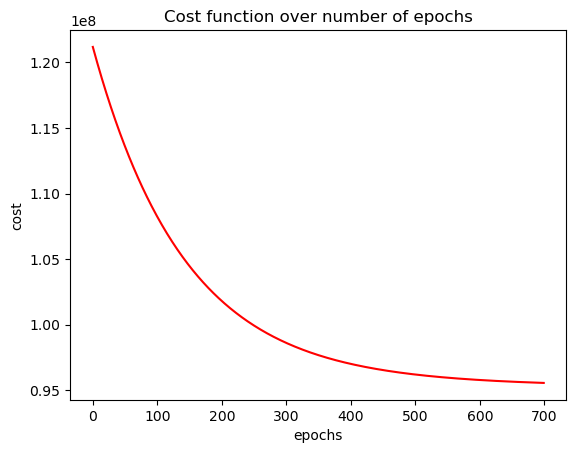

In [27]:
cost = pd.DataFrame(cost)
sns.lineplot(y=cost[0],x=cost.index,color="r")
plt.ylabel("cost")
plt.xlabel("epochs");
plt.title("Cost function over number of epochs");

# End 